Import Data and packages

In [0]:
import pandas as pd
import pylab as pl
import shapely
import json
import sklearn
import numpy as np


%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [0]:
from google.colab import drive

drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
cd gdrive

[Errno 2] No such file or directory: 'gdrive'
/content/gdrive


In [0]:
cd My\ Drive

/content/gdrive/My Drive


In [0]:
cd HW5/

/content/gdrive/My Drive/HW5


# LOAD DATA

In [0]:
StockInfo = pd.read_csv('https://raw.githubusercontent.com/rameyamey/MLTSAProject/master/RF2finalcoded.csv')

In [0]:
StockInfo.shape

(221, 16)

# REPLACE EMPTY CELLS IN A UNIFORM FASHION

In [0]:
StockInfo = StockInfo.replace([np.inf, -np.inf], np.nan)

# CHECK DATA VALUES AND EXTRACT VARIABLE NAMES

In [0]:
StockInfo.head()


,CompanyNo,Gender,Age,Educationcoded,children,sectorcode,popperlesshS,population,popbelowpovlevel,percentmenbusiness,percentfemalebusiness,implicitatt,exp1career,exp2fam,Slopeafterhire,fullslope
0,1,2,76,1.0,NaN,1,7.8,834615,10.7,55.2,44.8,0.363725,4.391218,3.584493,0.006573,0.006573
1,2,2,62,2.0,NaN,2,9.6,6138382,8.0,52.1,47.9,0.342364,4.349400,3.430855,0.000281,0.000281
2,3,2,58,1.0,NaN,3,9.6,6138382,8.0,52.1,47.9,0.342364,4.349400,3.430855,-0.001718,-0.001718
3,4,2,62,3.0,4.0,4,10.7,5779463,13.1,54.1,45.9,0.344999,4.355876,3.409393,-0.004694,-0.004557
4,5,1,58,4.0,2.0,5,10.7,5779463,13.1,54.1,45.9,0.344999,4.355876,3.409393,-0.007051,-0.007051


In [0]:
StockInfo.tail()

,CompanyNo,Gender,Age,Educationcoded,children,sectorcode,popperlesshS,population,popbelowpovlevel,percentmenbusiness,percentfemalebusiness,implicitatt,exp1career,exp2fam,Slopeafterhire,fullslope
216,217,2,55,3.0,4.0,35,9.6,6138382,8.0,52.1,47.9,0.342364,4.349400,3.430855,0.008688,0.008688
217,218,2,53,3.0,NaN,35,8.0,6069448,12.6,54.6,45.4,0.333241,4.347377,3.433144,0.006300,0.006257
218,219,2,53,4.0,NaN,13,7.0,4811732,9.8,53.7,46.3,0.343589,4.353727,3.460972,0.008107,0.007879
219,220,2,64,3.0,1.0,91,9.4,1615516,12.5,52.9,47.1,0.342665,4.177096,3.352179,0.008345,0.008345
220,221,2,59,4.0,NaN,82,7.3,444014,10.0,55.7,44.3,0.323369,4.227513,3.409574,-0.002418,-0.002041


In [0]:
StockInfo.columns

Index(['CompanyNo', 'Gender', 'Age', 'Educationcoded', 'children',
       'sectorcode', 'popperlesshS', 'population', 'popbelowpovlevel',
       'percentmenbusiness', 'percentfemalebusiness', 'implicitatt',
       'exp1career', 'exp2fam', 'Slopeafterhire', 'fullslope'],
      dtype='object')

# REPLACE MISSING VALUES USING KNN TECHNIQUE

[More info about this replacement method here](https://towardsdatascience.com/the-use-of-knn-for-missing-values-cf33d935c637)

In [0]:
from sklearn.impute import KNNImputer
imputerStockInfo = KNNImputer(n_neighbors=2)
imputerStockInfo.fit_transform(StockInfo)

array([[ 1.00e+00,  2.00e+00,  7.60e+01, ...,  3.58e+00,  6.57e-03,
         6.57e-03],
       [ 2.00e+00,  2.00e+00,  6.20e+01, ...,  3.43e+00,  2.81e-04,
         2.81e-04],
       [ 3.00e+00,  2.00e+00,  5.80e+01, ...,  3.43e+00, -1.72e-03,
        -1.72e-03],
       ...,
       [ 2.19e+02,  2.00e+00,  5.30e+01, ...,  3.46e+00,  8.11e-03,
         7.88e-03],
       [ 2.20e+02,  2.00e+00,  6.40e+01, ...,  3.35e+00,  8.34e-03,
         8.34e-03],
       [ 2.21e+02,  2.00e+00,  5.90e+01, ...,  3.41e+00, -2.42e-03,
        -2.04e-03]])

# MAKE A NEW DATAFRAME WITH NEW VALUES AND CHECK VALUES


In [0]:
StockInfoedit = pd.DataFrame(imputerStockInfo.fit_transform(StockInfo))

In [0]:
StockInfoedit.columns = StockInfo.columns

In [0]:
StockInfoedit.head()

,CompanyNo,Gender,Age,Educationcoded,children,sectorcode,popperlesshS,population,popbelowpovlevel,percentmenbusiness,percentfemalebusiness,implicitatt,exp1career,exp2fam,Slopeafterhire,fullslope,jobdiff
0,1.0,2.0,76.0,1.0,2.5,1.0,7.8,834615.0,10.7,55.2,44.8,0.363725,4.391218,3.584493,0.006573,0.006573,10.4
1,2.0,2.0,62.0,2.0,3.0,2.0,9.6,6138382.0,8.0,52.1,47.9,0.342364,4.349400,3.430855,0.000281,0.000281,4.2
2,3.0,2.0,58.0,1.0,3.0,3.0,9.6,6138382.0,8.0,52.1,47.9,0.342364,4.349400,3.430855,-0.001718,-0.001718,4.2
3,4.0,2.0,62.0,3.0,4.0,4.0,10.7,5779463.0,13.1,54.1,45.9,0.344999,4.355876,3.409393,-0.004694,-0.004557,8.2
4,5.0,1.0,58.0,4.0,2.0,5.0,10.7,5779463.0,13.1,54.1,45.9,0.344999,4.355876,3.409393,-0.007051,-0.007051,8.2


In [0]:
StockInfoedit.tail()

In [0]:
StockInfoedit['jobdiff']=StockInfoedit.percentmenbusiness-StockInfoedit.percentfemalebusiness

In [0]:
def evaluate(model, test_features, test_labels):
      predictions = model.predict(test_features)
      errors = abs(predictions - test_labels)
      mape = 100 * np.mean(errors / test_labels)
      accuracy = 100 - mape
      print('Model Performance')
      print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
      print('Accuracy = {:0.2f}%.'.format(accuracy))
      print("score", model.score(test_features, test_labels))
    
      return accuracy

# Bootstrap loop and save all classification accuracies

In [0]:
bootresults = pd.DataFrame({'iteration':[],'baseaccuracytrain':[],'baseaccuracytest':[],'randomaccuracytrain':[],'randomaccuracytest':[]})
featuretotals = []
bootres = []

#-------------------------------
rf_ls = []
#-------------------------------


import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

for i in range(1000):

  women = StockInfoedit[(StockInfoedit["Gender"] == 1)] 
  men = StockInfoedit[(StockInfoedit["Gender"] == 2)] 
  menboot = men.sample(32)
  frames = [women, menboot]
  newdata = pd.concat(frames)
  X = newdata.drop(['CompanyNo','Gender','Slopeafterhire','percentmenbusiness','percentfemalebusiness','exp2fam'], axis = 1)
  y = newdata.Gender


  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=100)
  X_train.describe()

  #clstock = RandomForestClassifier(n_estimators=100, 
                      #  criterion='gini', max_depth=5).fit(X_train, y_train)
  n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
# Number of features to consider at every split
  max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
  max_depth = [int(x) for x in np.linspace(2, 10, num = 11)]
  max_depth.append(None)
# Minimum number of samples required to split a node
  min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
  min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
  bootstrap = [True, False]
# Create the random grid
  random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}              
  #clstock.fit(X_train, y_train)
 # OGfit = clstock.fit(X_train, y_train)
 # OGscores = clstock.score(X_test, y_test
  #print(clstock.score(X_test, y_test))
  #print(clstock.feature_importances_)
  rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
  rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
  rf_random.fit(X_train, y_train)
  
  base_model = RandomForestClassifier(n_estimators = 10, random_state = 42, max_depth=3)
  base_model.fit(X_train, y_train)
  features = base_model.feature_importances_
  basemodelfit = base_model.fit(X_train, y_train)
  base_accuracy1 = evaluate(base_model, X_train, y_train)
  base_accuracy2 = evaluate(base_model, X_test, y_test)
  #print("###")
  best_random = rf_random.best_estimator_

  #-------------------------------
  rf_ls.append(best_random)
  #-------------------------------

  random_accuracy1 = evaluate(best_random, X_train, y_train)
  random_accuracy2 = evaluate(best_random, X_test, y_test)
  #still working on this part
  bootresults = bootresults.append({'iteration':i,'baseaccuracytrain':base_accuracy1,'baseaccuracytest':base_accuracy2,'randomaccuracytrain':random_accuracy1,'randomaccuracytest':random_accuracy2}, ignore_index=True)
  ##bootresults.append = ([i])
#cols=['iteration']
#totalbootres = pd.DataFrame(bootresults,columns=cols)
 # bootres = np.concatenate((bootres,bootresults1))
  #bootframesfinal = pd.concat(bootframes)

  
  #featuretotals.append((clstock.feature_importances_))

#bootresultstotal = bootresults
#featuretotalsfinal = featuretotals
bootresults.to_csv('bootstrapclassification.csv')

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   19.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Model Performance
Average Error: 0.1228 degrees.
Accuracy = 92.11%.
score 0.8771929824561403
Model Performance
Average Error: 0.2857 degrees.
Accuracy = 85.71%.
score 0.7142857142857143
Model Performance
Average Error: 0.1053 degrees.
Accuracy = 92.98%.
score 0.8947368421052632
Model Performance
Average Error: 0.4286 degrees.
Accuracy = 78.57%.
score 0.5714285714285714
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    4.7s


Model Performance
Average Error: 0.0877 degrees.
Accuracy = 94.74%.
score 0.9122807017543859
Model Performance
Average Error: 0.5714 degrees.
Accuracy = 64.29%.
score 0.42857142857142855
Model Performance
Average Error: 0.0877 degrees.
Accuracy = 92.11%.
score 0.9122807017543859
Model Performance
Average Error: 0.4286 degrees.
Accuracy = 78.57%.
score 0.5714285714285714


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   18.7s finished


# Load in saved data and model features

In [0]:
feat = pd.DataFrame(data=featuretotals)

In [0]:
testresults = pd.read_csv('bootstrapclassification.csv')

In [0]:
print(features)

[0.03826773 0.03831354 0.02603304 0.05280202 0.18572897 0.10601383
 0.10525256 0.06730096 0.07564843 0.2067097  0.05224747 0.04568174]


In [0]:
testresults.head()

,iteration,baseaccuracytrain,baseaccuracytest,randomaccuracytrain,randomaccuracytest
0,0,87.719298,78.571429,92.982456,100.000000
1,1,78.947368,64.285714,83.333333,71.428571
2,2,90.350877,71.428571,86.842105,42.857143
3,3,90.350877,35.714286,93.859649,64.285714
4,4,86.842105,85.714286,84.210526,71.428571


# Plot Bootstrap Distribution

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

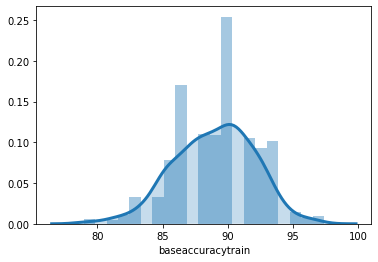

In [0]:
sns.distplot(testresults['baseaccuracytrain'],hist = True, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})

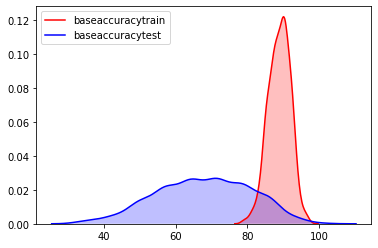

In [0]:
p1=sns.kdeplot(testresults['baseaccuracytrain'], shade=True, color="r")
p1=sns.kdeplot(testresults['baseaccuracytest'], shade=True, color="b")


# PLOT CONFUSION MATRIX

Confusion matrix, without normalization
Normalized confusion matrix


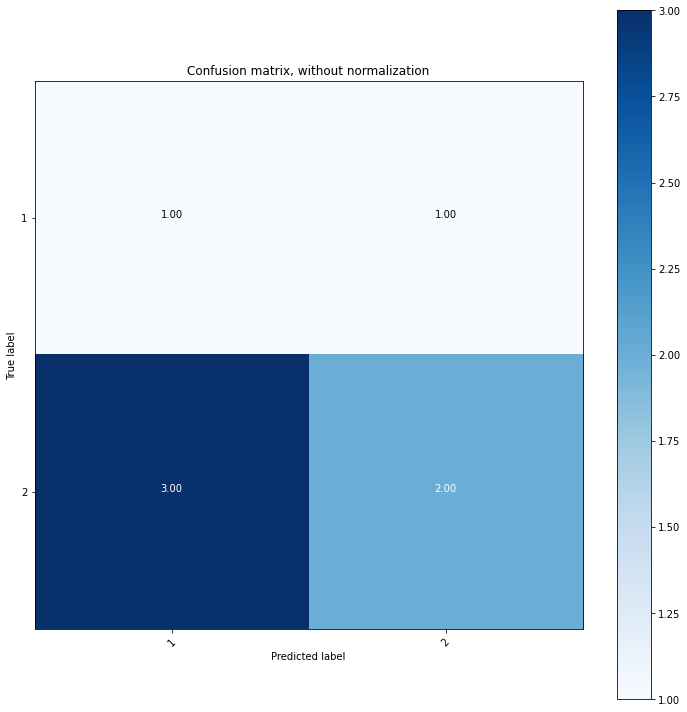

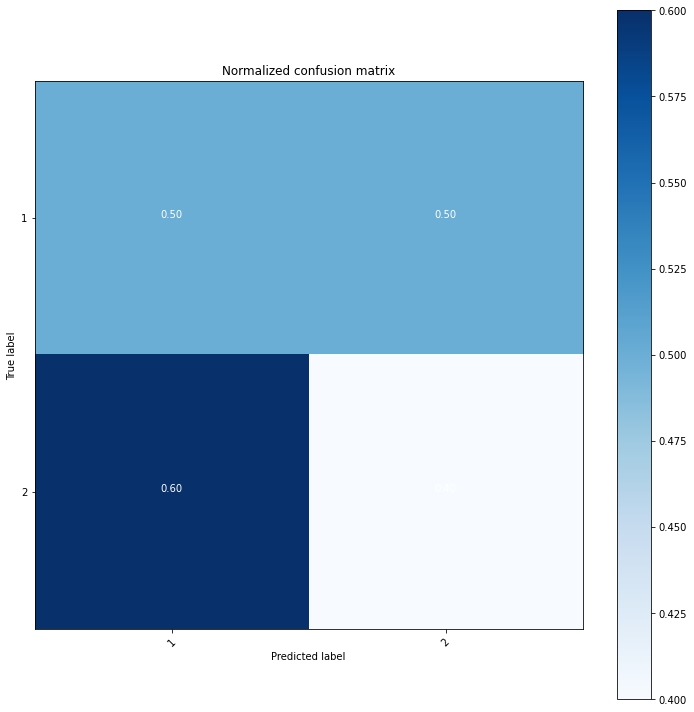

In [0]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "%.2f"%cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
# Compute confusion matrix
cnf_matrix = sklearn.metrics.confusion_matrix(y_test, base_model.predict(X_test))

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10,10))

plot_confusion_matrix(cnf_matrix, classes=["%d"%i for i in np.unique(y)],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(10,10))
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, classes=["%d"%i for i in np.unique(y)], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# RUN CORRELATION AND COVARIANCE MATRICES TO OBSERVE YOUR FEATURES (MAKE SURE NOTHING IS TOO CORRELATED OR WONKY)

In [0]:
features = X.columns

In [0]:
print(X.columns)

Index(['Age', 'Educationcoded', 'children', 'sectorcode', 'popperlesshS',
       'population', 'popbelowpovlevel', 'implicitatt', 'exp1career',
       'fullslope', 'jobdiff'],
      dtype='object')


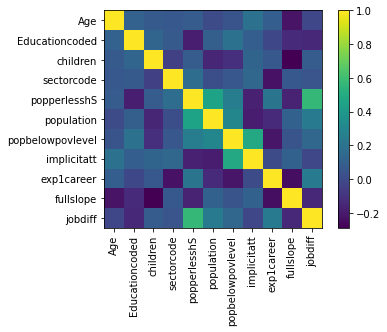

In [0]:
corrMatrix = np.corrcoef(X.T)
pl.imshow((corrMatrix))
pl.colorbar()
pl.xticks(range(len(features)), features, rotation=90)
pl.yticks(range(len(features)), features);

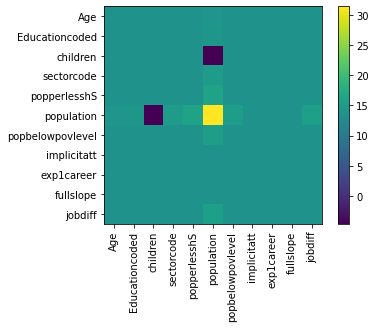

In [0]:
covMatrix = np.cov(X.T)
pl.imshow(np.log(covMatrix - covMatrix.min() + 0.01))
pl.colorbar()
pl.xticks(range(len(features)), features, rotation=90)
pl.yticks(range(len(features)), features);

# WHAT FEATURES MATTER MOST? RUN FEATURE INDICES AND GRAPH

In [0]:
importances = base_model.feature_importances_
importances


std = np.std([tree.feature_importances_ for tree in base_model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
importances[indices]

array([0.22, 0.17, 0.16, 0.11, 0.09, 0.08, 0.05, 0.04, 0.04, 0.03, 0.  ])

Feature ranking:
1. feature exp1career (0.224305)
2. feature sectorcode (0.169888)
3. feature popperlesshS (0.156097)
4. feature implicitatt (0.112428)
5. feature Educationcoded (0.093849)
6. feature fullslope (0.080830)
7. feature children (0.054782)
8. feature popbelowpovlevel (0.043127)
9. feature population (0.039637)
10. feature jobdiff (0.025057)
11. feature Age (0.000000)


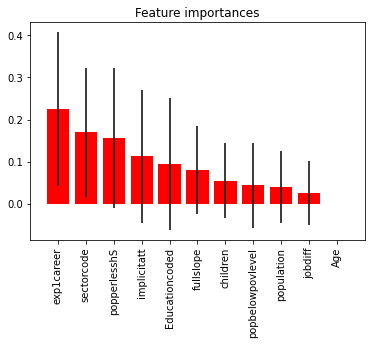

In [0]:

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, np.array(features)[indices][f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(features)[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

# ROC Curve Creation

In [0]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc

In [0]:
# Updatin the figure features
rcParams.update({'ytick.labelsize': 10})
rcParams.update({'xtick.labelsize': 10})
rcParams.update({'legend.fontsize': 9})
rcParams.update({'figure.dpi': 300})
rcParams.update({'legend.fontsize': 10})
rcParams.update({'axes.labelsize': 10})

fig, ax = plt.subplots(figsize=(6,5))
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
for i in range(10):
  #plotting each roc curve
  viz = plot_roc_curve(rf_ls[i], X, y, name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
  interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
  interp_tpr[0] = 0.0
  tprs.append(interp_tpr)
  aucs.append(viz.roc_auc)
#estimating the mean of true positive rate
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
#finding the mean area under the curve
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05])
ax.legend(loc="lower right")
ax.set_title('Receiver Operating Characteristic Curve', fontsize = 10)
plt.savefig('roc.png',bbox_inches='tight')